<a href="https://colab.research.google.com/github/olukunlebusayo/dog-cat-prediction/blob/master/CSCE508_Final_Project_Image_Processing_C00408606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#loading libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from keras.preprocessing import image
from keras.models import Model
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
# import the pre-trained weights for the InceptionResNetV2 image classification model

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

In [0]:
#set the image width and height
img_width	=	150	
img_height	=	150	

#create a model using the imported pre-trained weights and removing the top layer
model = InceptionResNetV2(weights="imagenet",	include_top=False,	input_shape=(img_width,	img_height,	3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
219062272/219055592 [==============================] - 15s 0us/step


In [0]:
#	Freeze	all	lower	layers		
for	layer	in	model.layers:
  layer.trainable	=	False

In [0]:
# add custom layers

x = model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(1, activation="sigmoid")(x)

print(model.summary())

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
________________________________________________________________________________

In [0]:
#	data	augmentation	for	training	
train_datagen	=	ImageDataGenerator(rescale=1./255,	shear_range=0.2, zoom_range=0.2,	horizontal_flip=True)	
	
#	no	augmentation	for	testing:	rescaling	only	
valid_datagen	=	ImageDataGenerator(rescale=1./255,	horizontal_flip=False)		
test_datagen	=	image.ImageDataGenerator(rescale=1./255,	horizontal_flip=False)

batch_size	=	20	
	
#	a	generator	that	reads	images	found	in	'data/train',	and	generates	batches	of	augmented	image	data	
train_generator	=	train_datagen.flow_from_directory(	
								'/content/drive/My Drive/data/train',		#	directory	with	training	data	
								target_size=(img_height,	img_width),		#	all	images	will	be	resized	to	150x150	
								color_mode="rgb",	
								batch_size=batch_size,	
								class_mode='binary')		#	only	two	classes,	so	we	are	not	using	categorical	labels	
	
#	this	is	a	similar	generator,	for	validation	data	
valid_generator	=	valid_datagen.flow_from_directory('/content/drive/My Drive/data/valid',	#	directory	with	validation	data	
								target_size=(img_height,	img_width), color_mode="rgb",	batch_size=batch_size, class_mode='binary')	

#	this	is	a	similar	generator,	for	test	data	
test_generator	=	test_datagen.flow_from_directory('/content/drive/My Drive/data/test',	#	directory	with	test	data	
								target_size=(img_height,	img_width), color_mode="rgb",	batch_size=batch_size, class_mode='binary',
                shuffle = False)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [0]:
#create a model called model_final
model_final	=	keras.models.Model(inputs=model.input,	outputs=output)

In [0]:
#configure model (model_final) for training
model_final.compile(loss='binary_crossentropy',	optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#train the model

history = model_final.fit_generator(train_generator,
                                    steps_per_epoch=2000	//	batch_size,
                                    epochs=20,
                                    validation_data=valid_generator,
                                    validation_steps=400	//	batch_size)	

Epoch 1/20
100/100 [==============================] - 1133s 11s/step - loss: 0.8359 - acc: 0.6990 - val_loss: 0.5741 - val_acc: 0.9175
Epoch 2/20
100/100 [==============================] - 27s 275ms/step - loss: 0.4263 - acc: 0.8080 - val_loss: 1.0169 - val_acc: 0.8650
Epoch 3/20
100/100 [==============================] - 27s 273ms/step - loss: 0.4469 - acc: 0.8185 - val_loss: 0.3220 - val_acc: 0.9600
Epoch 4/20
100/100 [==============================] - 27s 269ms/step - loss: 0.3913 - acc: 0.8410 - val_loss: 0.1588 - val_acc: 0.9700
Epoch 5/20
100/100 [==============================] - 27s 273ms/step - loss: 0.3694 - acc: 0.8470 - val_loss: 0.3872 - val_acc: 0.9550
Epoch 6/20
100/100 [==============================] - 27s 271ms/step - loss: 0.3484 - acc: 0.8570 - val_loss: 0.5320 - val_acc: 0.9250
Epoch 7/20
100/100 [==============================] - 27s 273ms/step - loss: 0.3317 - acc: 0.8725 - val_loss: 0.3076 - val_acc: 0.9725
Epoch 8/20
100/100 [==============================] - 2

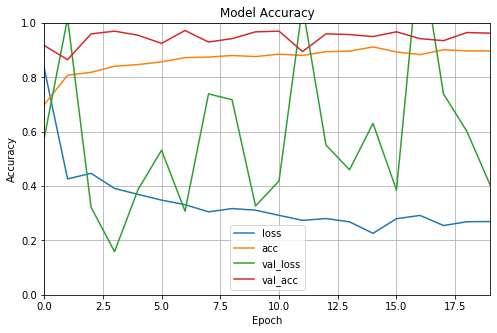

In [0]:
#summarize train/val accuracy and loss

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.gca().set_ylim(0, 1)
plt.savefig('transfer_learning')

In [0]:
eval_result = model_final.evaluate_generator(test_generator)

print(eval_result)

[0.2663565649444413, 0.975]


In [0]:
model_final.save('xfer_learning_project.h5')

Epoch 1/20
100/100 [==============================] - 42s 416ms/step - loss: 0.6009 - acc: 0.7485 - val_loss: 0.2099 - val_acc: 0.9575
Epoch 2/20
100/100 [==============================] - 27s 275ms/step - loss: 0.3750 - acc: 0.8385 - val_loss: 0.9116 - val_acc: 0.8725
Epoch 3/20
100/100 [==============================] - 27s 274ms/step - loss: 0.3622 - acc: 0.8400 - val_loss: 0.3071 - val_acc: 0.9550
Epoch 4/20
100/100 [==============================] - 28s 275ms/step - loss: 0.3403 - acc: 0.8680 - val_loss: 0.6428 - val_acc: 0.9425
Epoch 5/20
100/100 [==============================] - 27s 274ms/step - loss: 0.3147 - acc: 0.8725 - val_loss: 0.2003 - val_acc: 0.9625
Epoch 6/20
100/100 [==============================] - 28s 276ms/step - loss: 0.2531 - acc: 0.8970 - val_loss: 0.3974 - val_acc: 0.9625
Epoch 7/20
100/100 [==============================] - 27s 274ms/step - loss: 0.2837 - acc: 0.8880 - val_loss: 1.1058 - val_acc: 0.8800
Epoch 8/20
100/100 [==============================] - 2

(0, 1)

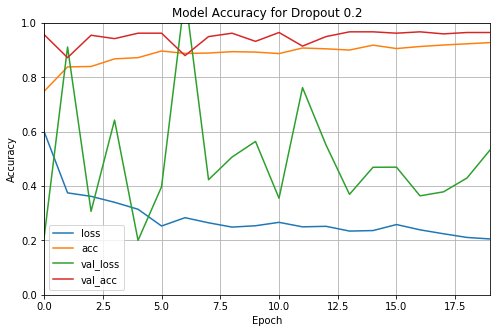

In [0]:
# Reducing the dropout to 0.2 from 0.5	

#	add	custom	layers	
x	=	model.output
x	=	keras.layers.Flatten()(x)			
x	=	keras.layers.Dense(64,	activation="relu")(x)	
x	=	keras.layers.Dropout(0.2)(x)	
output	=	keras.layers.Dense(1,	activation="sigmoid")(x)	
#print(model.summary())	


model_final	=	keras.models.Model(inputs=model.input,	outputs=output)	
	
model_final.compile(loss='binary_crossentropy',	optimizer='rmsprop', metrics=['accuracy'])	

history_dropout_reduced = model_final.fit_generator(	
								train_generator,	
								steps_per_epoch=2000	//	batch_size,	
								epochs=20,	
								validation_data=valid_generator,	
								validation_steps=400	//	batch_size)	

pd.DataFrame(history_dropout_reduced.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Model Accuracy for Dropout 0.2")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.gca().set_ylim(0, 1)

In [0]:
eval_result_dropout = model_final.evaluate_generator(test_generator)

print(eval_result_dropout)

[0.3439639285127248, 0.975]


Found 1500 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/20
75/75 [==============================] - 41s 540ms/step - loss: 0.9446 - acc: 0.7207 - val_loss: 0.2646 - val_acc: 0.9500
Epoch 2/20
75/75 [==============================] - 21s 286ms/step - loss: 0.4907 - acc: 0.7893 - val_loss: 0.2834 - val_acc: 0.9625
Epoch 3/20
75/75 [==============================] - 21s 280ms/step - loss: 0.4153 - acc: 0.8220 - val_loss: 0.4475 - val_acc: 0.9550
Epoch 4/20
75/75 [==============================] - 21s 283ms/step - loss: 0.4007 - acc: 0.8333 - val_loss: 0.3139 - val_acc: 0.9700
Epoch 5/20
75/75 [==============================] - 21s 276ms/step - loss: 0.3920 - acc: 0.8547 - val_loss: 0.3361 - val_acc: 0.9600
Epoch 6/20
75/75 [==============================] - 21s 276ms/step - loss: 0.3667 - acc: 0.8500 - val_loss: 0.2851 - val_acc: 0.9625
Epoch 7/20
75/75 [==============================] - 21s 283ms/step - loss: 0.3

(0, 1)

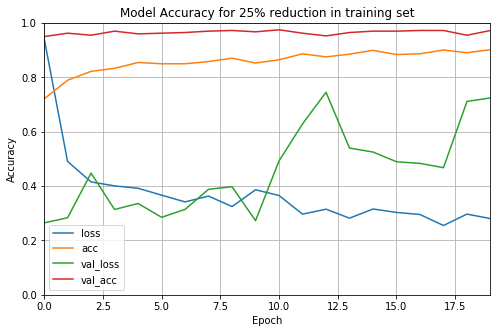

In [0]:
#	data	augmentation	for	training set reduced to 1500	
img_width	=	150
img_height	=	150

model = InceptionResNetV2(weights="imagenet",	include_top=False,	input_shape=(img_width,	img_height,	3))	

#	Freeze	all	lower	layers		
for	layer	in	model.layers:
		layer.trainable	=	False

#	add	custom	layers	
x	=	model.output
x	=	keras.layers.Flatten()(x)			
x	=	keras.layers.Dense(64,	activation="relu")(x)	
x	=	keras.layers.Dropout(0.5)(x)	
output	=	keras.layers.Dense(1,	activation="sigmoid")(x)	
#print(model.summary())	

#	data	augmentation	for	training	
train_datagen	=	ImageDataGenerator(rescale=1./255,	shear_range=0.2, zoom_range=0.2,	horizontal_flip=True, validation_split= 0.25)	
	
#	no	augmentation	for	testing:	rescaling	only	
valid_datagen	=	ImageDataGenerator(rescale=1./255,	horizontal_flip=False)		
test_datagen	=	image.ImageDataGenerator(rescale=1./255,	horizontal_flip=False)

batch_size	=	20	
	
#	a	generator	that	reads	images	found	in	'data/train',	and	generates	batches	of	augmented	image	data	
train_generator	=	train_datagen.flow_from_directory(	
								'/content/drive/My Drive/data/train',		#	directory	with	training	data	
								target_size=(img_height,	img_width),		#	all	images	will	be	resized	to	150x150	
								color_mode="rgb",	
								batch_size=batch_size,
                subset='training',	
								class_mode='binary')		#	only	two	classes,	so	we	are	not	using	categorical	labels	
	
#	this	is	a	similar	generator,	for	validation	data	
valid_generator	=	valid_datagen.flow_from_directory('/content/drive/My Drive/data/valid',	#	directory	with	validation	data	
								target_size=(img_height,	img_width), color_mode="rgb",	batch_size=batch_size, class_mode='binary')	

#	this	is	a	similar	generator,	for	test	data	
test_generator	=	test_datagen.flow_from_directory('/content/drive/My Drive/data/test',	#	directory	with	test	data	
								target_size=(img_height,	img_width), color_mode="rgb",	batch_size=batch_size, class_mode='binary',
                shuffle = False)		

model_final	=	keras.models.Model(inputs=model.input,	outputs=output)	
	
model_final.compile(loss='binary_crossentropy',	optimizer='rmsprop', metrics=['accuracy'])	

history_reduced_training_set = model_final.fit_generator(	
								train_generator,	
								steps_per_epoch= 1500	//	batch_size,	
								epochs=20,	
								validation_data=valid_generator,	
								validation_steps=400	//	batch_size)	

pd.DataFrame(history_reduced_training_set.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Model Accuracy for 25% reduction in training set")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.gca().set_ylim(0, 1)

In [0]:
eval_result_25_training = model_final.evaluate_generator(test_generator)

print(eval_result_25_training)

[0.3122110446125455, 0.9775]


Found 1000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 38s 769ms/step - loss: 1.0732 - acc: 0.6640 - val_loss: 0.2111 - val_acc: 0.9500
Epoch 2/20
50/50 [==============================] - 15s 303ms/step - loss: 0.4985 - acc: 0.7670 - val_loss: 0.1838 - val_acc: 0.9475
Epoch 3/20
50/50 [==============================] - 15s 293ms/step - loss: 0.4383 - acc: 0.7980 - val_loss: 0.3086 - val_acc: 0.9275
Epoch 4/20
50/50 [==============================] - 14s 288ms/step - loss: 0.3909 - acc: 0.8260 - val_loss: 0.2143 - val_acc: 0.9650
Epoch 5/20
50/50 [==============================] - 15s 295ms/step - loss: 0.3783 - acc: 0.8290 - val_loss: 0.4838 - val_acc: 0.9325
Epoch 6/20
50/50 [==============================] - 15s 293ms/step - loss: 0.3499 - acc: 0.8480 - val_loss: 0.3981 - val_acc: 0.9625
Epoch 7/20
50/50 [==============================] - 15s 305ms/step - loss: 0.3

(0, 1)

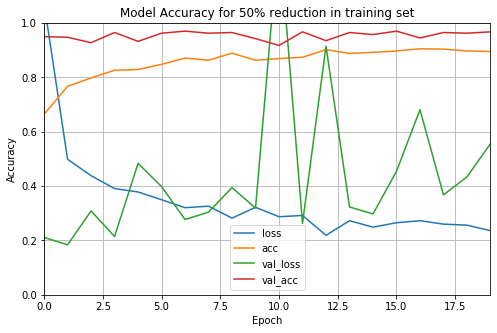

In [0]:
#	data	augmentation	for	training set reduced to 1000	

img_width	=	150
img_height	=	150

model = InceptionResNetV2(weights="imagenet",	include_top=False,	input_shape=(img_width,	img_height,	3))	

#	Freeze	all	lower	layers		
for	layer	in	model.layers:
		layer.trainable	=	False

#	add	custom	layers	
x	=	model.output
x	=	keras.layers.Flatten()(x)			
x	=	keras.layers.Dense(64,	activation="relu")(x)	
x	=	keras.layers.Dropout(0.5)(x)	
output	=	keras.layers.Dense(1,	activation="sigmoid")(x)	
#print(model.summary())	

#	data	augmentation	for	training	
train_datagen	=	ImageDataGenerator(rescale=1./255,	shear_range=0.2, zoom_range=0.2,	horizontal_flip=True, validation_split= 0.5)	
	
#	no	augmentation	for	testing:	rescaling	only	
valid_datagen	=	ImageDataGenerator(rescale=1./255,	horizontal_flip=False)		
test_datagen	=	image.ImageDataGenerator(rescale=1./255,	horizontal_flip=False)

batch_size	=	20	
	
#	a	generator	that	reads	images	found	in	'data/train',	and	generates	batches	of	augmented	image	data	
train_generator	=	train_datagen.flow_from_directory(	
								'/content/drive/My Drive/data/train',		#	directory	with	training	data	
								target_size=(img_height,	img_width),		#	all	images	will	be	resized	to	150x150	
								color_mode="rgb",	
								batch_size=batch_size,
                subset='training',	
								class_mode='binary')		#	only	two	classes,	so	we	are	not	using	categorical	labels	
	
#	this	is	a	similar	generator,	for	validation	data	
valid_generator	=	valid_datagen.flow_from_directory('/content/drive/My Drive/data/valid',	#	directory	with	validation	data	
								target_size=(img_height,	img_width), color_mode="rgb",	batch_size=batch_size, class_mode='binary')	

#	this	is	a	similar	generator,	for	test	data	
test_generator	=	test_datagen.flow_from_directory('/content/drive/My Drive/data/test',	#	directory	with	test	data	
								target_size=(img_height,	img_width), color_mode="rgb",	batch_size=batch_size, class_mode='binary',
                shuffle = False)		

model_final	=	keras.models.Model(inputs=model.input,	outputs=output)	
	
model_final.compile(loss='binary_crossentropy',	optimizer='rmsprop', metrics=['accuracy'])	

history_reduced_training_set2 = model_final.fit_generator(	
								train_generator,	
								steps_per_epoch= 1000	//	batch_size,	
								epochs=20,	
								validation_data=valid_generator,	
								validation_steps=400	//	batch_size)	

pd.DataFrame(history_reduced_training_set2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Model Accuracy for 50% reduction in training set")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.gca().set_ylim(0, 1)

In [0]:
eval_result_50_training = model_final.evaluate_generator(test_generator)

print(eval_result_50_training)

[0.280591593236066, 0.975]


In [0]:
"""
Next Questions:
Add	predict	step:	
– Separate	the	correctly	and	incorrectly	classified	samples	of	each	class	
– Count	them	
– Inspect	them:	form	conjectures	of	why	the	samples	were	mis-classified

"""

'\nNext Questions:\nAdd\tpredict\tstep:\t\n– Separate\tthe\tcorrectly\tand\tincorrectly\tclassified\tsamples\tof\teach\tclass\t\n– Count\tthem\t\n– Inspect\tthem:\tform\tconjectures\tof\twhy\tthe\tsamples\twere\tmis-classified\n\n'

In [0]:
# adding prediction step

y_pred = model_final.predict_generator(test_generator)

In [0]:
# extract the true test labels

y_true = test_generator.classes

In [0]:
# create a list for the classes

class_name = ["cats", "dogs"]

In [0]:
# turn the predicted probabilities for classes to 0 and 1
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
     y_pred[i] = 1
  else:
    y_pred[i] = 0

In [0]:
print(y_pred)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [0]:
# Check the number of correct and incorrect predictions

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[384,  16],
       [  4, 396]])

In [0]:
# check the classification metrics of the test data
from sklearn import metrics
classification_metrics = metrics.classification_report(y_true, y_pred, target_names = class_name)

print(classification_metrics)

              precision    recall  f1-score   support

        cats       0.99      0.96      0.97       400
        dogs       0.96      0.99      0.98       400

    accuracy                           0.97       800
   macro avg       0.98      0.97      0.97       800
weighted avg       0.98      0.97      0.97       800



In [0]:
from sklearn.metrics import accuracy_score
print("Test Accuracy of the model is : " + str(accuracy_score(y_true, y_pred)))
print("The model has " + str(accuracy_score(y_true, y_pred, normalize=False)) + " images correctly predicted out of the total " + str(len(y_pred)))

Test Accuracy of the model is : 0.975
The model has 780 images correctly predicted out of the total 800


In [0]:
import numpy as np
import os
import cv2
from tqdm import tqdm
DATADIR = "/content/drive/My Drive/data/test"

test_dataset = [] #initialize an empty list to store the loaded images and their respective labels

def create_dataset():
    for category in class_name:  # do for all folders in the dataset

        path = os.path.join(DATADIR, category)  # create path to all the folders
        label = class_name.index(category)  # get the classification label as the index of the folders in the dataset
       
        for img in tqdm(os.listdir(path)):  # iterate over each image in all the folders
            try:
                img = cv2.imread(os.path.join(path, img)) # read image
                img = cv2.resize(img, (150, 150)) # resize the images for uniformity and model acceptability
                img = img.astype(np.float32) # convert images to float
                test_dataset.append([img, label]) # add the image and its label to the dataset's list
                
            except Exception as e:  # error handling with try and catch.
                pass   

create_dataset()

100%|██████████| 400/400 [00:02<00:00, 167.56it/s]


In [0]:
#Split the test dataset into images and their respective labels

x = []
y = []
for img, label in test_dataset:
    x.append(img)
    y.append(label)

In [0]:
#convert the test dataset from list to Numpy ndarray

X = np.asarray(x)
X = X/255 #scale between 0 and 1

Y = np.asarray(y)

print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [0]:
# One-hot encoding for the test data labels

from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
num_classes = 2
Y = np_utils.to_categorical(Y, num_classes)

print(Y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [0]:
# create a subset of the test images for prediction and visualization
test = X[395:405]

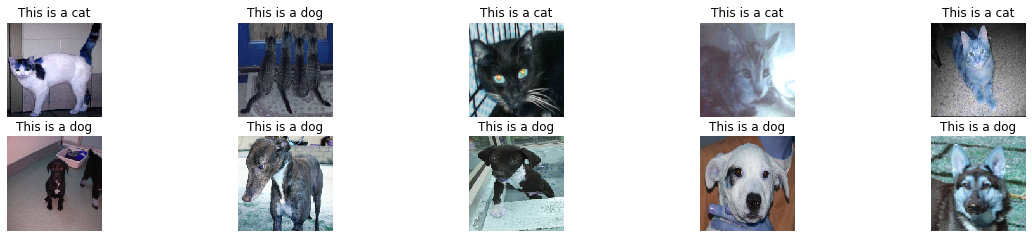

In [0]:
# Predict and visualize
predicted_labels = []
predictions=[]
plt.figure(figsize = (20, 8))
for num, images in enumerate(test):
  j = np.expand_dims(images, axis = 0)
  predict = model_final.predict(j)
  predictions.append(predict)
  if predict[0] > 0.5:
     predict[0] = 1
  else:
    predict[0] = 0
  label = class_name[int(predict[0])]
  predicted_labels.append(label)
  plt.subplot(4, 5, num+1)
  plt.title( 'This is a ' + label[:-1])
  plt.axis('off')
  plt.imshow(images)

In [0]:
# create a data set and true labels of cats only category
X_test_cats_only = X[:400]
Y_test_cats_only = y[:400]

In [0]:
# Predict on cats only
prediction_cats= model_final.predict(X_test_cats_only)

In [0]:
# convert the predicted probabilities for classes to category of 0 and 1

for i in range(len(prediction_cats)):
  if prediction_cats[i] > 0.5:
     prediction_cats[i] = 1
  else:
    prediction_cats[i] = 0

In [0]:
# check the classification metrics of the cats only test data
from sklearn import metrics
classification_metrics = metrics.classification_report(Y_test_cats_only, prediction_cats, target_names = class_name)
print(classification_metrics)

              precision    recall  f1-score   support

        cats       1.00      0.95      0.97       400
        dogs       0.00      0.00      0.00         0

    accuracy                           0.95       400
   macro avg       0.50      0.47      0.49       400
weighted avg       1.00      0.95      0.97       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
# Check the number of correct and incorrect preducutions
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_cats_only, prediction_cats)

array([[379,  21],
       [  0,   0]])

In [0]:
# Get the location of the incorrect predictions for visualization and further analysis
indices = [i for i, v in enumerate(prediction_cats) if prediction_cats[i]!=Y_test_cats_only[i]]
subset_of_wrong_prediction = [X_test_cats_only[i] for i in indices ]

In [0]:
# confirm that the number is same as obtained from confusion matrix

len(indices)

21

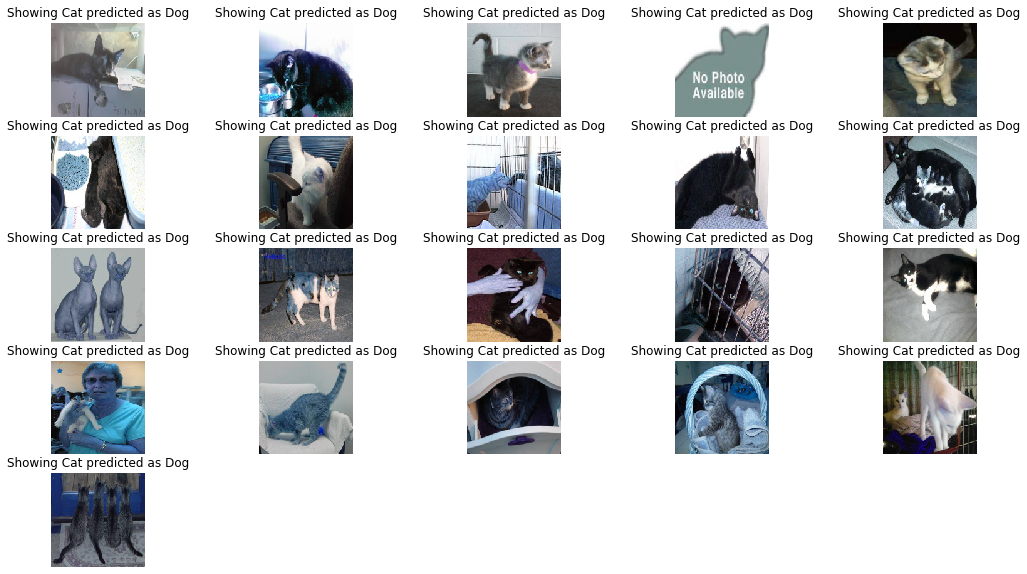

In [0]:
plt.figure(figsize = (18,10))
for num, images in enumerate(subset_of_wrong_prediction):
  plt.subplot(5, 5, num+1)
  plt.title( 'Showing Cat predicted as Dog')
  plt.axis('off')
  plt.imshow(images)

In [0]:
# create a data set and true labels of dogs only category

X_test_dogs_only = X[400:]
Y_test_dogs_only = y[400:]

In [0]:
# Make predictions on dogs only
predict_dogs= model_final.predict(X_test_dogs_only)

# convert the predicted probabilities for classes to category of 0 and 1
for i in range(len(predict_dogs)):
  if predict_dogs[i] > 0.5:
     predict_dogs[i] = 1
  else:
    predict_dogs[i]=0

In [0]:
#check the classification metrics of the dogs only test data
from sklearn import metrics
classification_metrics = metrics.classification_report(Y_test_dogs_only, predict_dogs, target_names = class_name)
print(classification_metrics)

              precision    recall  f1-score   support

        cats       0.00      0.00      0.00         0
        dogs       1.00      0.98      0.99       400

    accuracy                           0.98       400
   macro avg       0.50      0.49      0.49       400
weighted avg       1.00      0.98      0.99       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
# Check the number of correct and incorrect preducutions
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_dogs_only, predict_dogs)

array([[  0,   0],
       [  9, 391]])

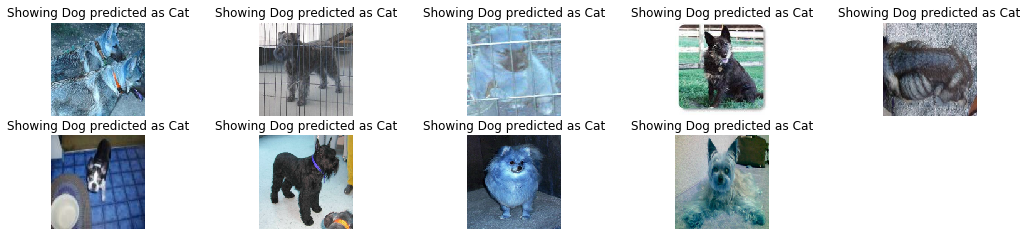

In [0]:
# Get the location of the incorrect predictions for visualization and further analysis
indices = [i for i, v in enumerate(predict_dogs) if predict_dogs[i]!=Y_test_dogs_only[i]]
subset_of_wrong_prediction = [X_test_dogs_only[i] for i in indices ]

plt.figure(figsize = (18,10))
for num, images in enumerate(subset_of_wrong_prediction):
  plt.subplot(5, 5, num+1)
  plt.title( 'Showing Dog predicted as Cat')
  plt.axis('off')
  plt.imshow(images)